<h1>Rock Paper and Scissors </h1>
<h4>Download train set here <a href="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip">click me</a></h2>
<h4>Download test set here <a href="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip">click me</a></h2>

In [4]:
import os 
import tensorflow as tf

train_rock_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps\\rock')
train_sissor_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps\\scissors')
train_paper_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps\\paper')

test_rock_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps-test-set\\rock')
test_sissor_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps-test-set\\scissors')
test_paper_dir=os.path.join('C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps-test-set\\paper')

In [5]:
train_rock_name=os.listdir(train_rock_dir)
train_sissor_name=os.listdir(train_sissor_dir)
train_paper_name=os.listdir(train_paper_dir)

test_rock_name=os.listdir(test_rock_dir)
test_sissor_name=os.listdir(test_sissor_dir)
test_paper_name=os.listdir(test_paper_dir)



In [6]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_sissor_dir)))


print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissors images:', len(os.listdir(test_sissor_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840
total test rock images: 124
total test paper images: 124
total test scissors images: 124


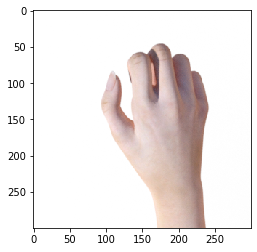

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rock_sample=os.path.join(train_rock_dir,train_rock_name[0])
img=mpimg.imread(rock_sample)
plt.imshow(img)

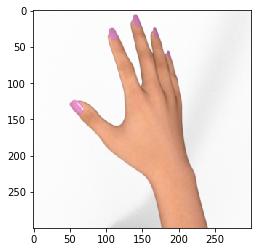

In [8]:
test_paper_sample=os.path.join(test_paper_dir,test_paper_name[0])
img=mpimg.imread(test_paper_sample)
plt.imshow(img)

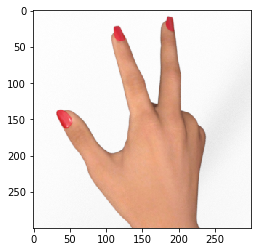

In [9]:
test_sissor_sample=os.path.join(test_sissor_dir,test_sissor_name[0])
img=mpimg.imread(test_sissor_sample)
plt.imshow(img)

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps\\"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
       rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:\\Users\\Dell\\Desktop\\Tensoflow Bitch\\Rock paper siccors\\rps-test-set\\"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________